<a href="https://colab.research.google.com/github/Alexa-Malina/courses/blob/master/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import statsmodels as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dat = pd.read_csv("/shhs.csv")
dat.head(4)

,rdi4p,bmi,Waist,age,sex,log_rdi4p
0,1.438083,21.78,86.0,55,1,0.387048
1,17.802198,32.95,107.0,78,1,1.274209
2,4.853556,24.11,82.0,77,0,0.767420
3,0.797342,20.19,85.0,48,1,0.254631


In [59]:
#dat = dat.drop(['clinic', 'COPD15', 'ASTHMA15', 'slp_lat', 'time_bed','timest1p', 'timest2p'],\
 #                 axis = 1)

In [87]:
dat= dat[["rdi4p", "bmi"]]


In [88]:
dat.head(4)

,rdi4p,bmi
0,1.438083,21.78
1,17.802198,32.95
2,4.853556,24.11
3,0.797342,20.19


In [91]:
#dat = dat.dropna()
dat =dat.assign(log_rdi4p=np.log(dat.rdi4p+1))


In [92]:
#pd.to_numeric(dat.bmi)

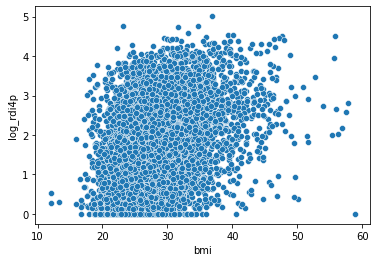

In [93]:
sns.scatterplot(data= dat, x="bmi", y="log_rdi4p")

In [94]:
results = smf.ols('log_rdi4p ~ bmi', data = dat).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_rdi4p   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     973.8
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          5.47e-199
Time:                        00:28:14   Log-Likelihood:                -8893.0
No. Observations:                6333   AIC:                         1.779e+04
Df Residuals:                    6331   BIC:                         1.780e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3430      0.067     -5.111      0.000      -0.475      -0.211
bmi            0.0722      0.002     31.207      0.000       0.068       0.077
==============================================================================
Omnibus:                      202.903   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.575
Skew:                           0.266   Prob(JB):                     4.04e-32
Kurtosis:                       2.485   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
yhat = results.predict(dat['bmi'])

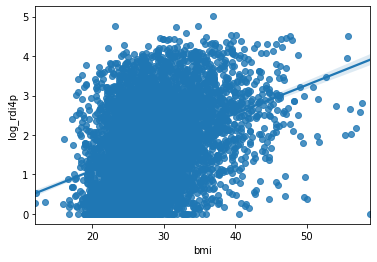

In [102]:
sns.regplot(x="bmi",
            y="log_rdi4p", 
            data=dat);

In [109]:
xtest= {"bmi" : 30}
yhat30=results.predict(xtest)
print(yhat30)

print(np.exp(yhat30))

0    1.823325
dtype: float64
0    6.192413
dtype: float64


In [97]:
#fit = smf.ols('log_rdi4p ~ bmi', data = dat)
#fit.summary()
#sns.scatterplot(dat['bmi'], dat['log_rdi4p']
#yhat = fit.predict(dat['bmi'])  
#sns.scatterplot(yhat, dat['PD']),
#plt.plot([-1, 3], [-1, 3], linewidth=2)
